In [75]:
!which conda

/home/abhinavmishra/anaconda3/bin/conda


In [76]:
!which python

/home/abhinavmishra/anaconda3/bin/python


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

In [78]:
df = pd.read_parquet("green_tripdata_2025-10.parquet")

In [79]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-10-01 00:21:47,2025-10-01 00:24:37,N,1.0,247,69,1.0,0.70,5.80,...,0.5,1.70,0.00,NaN,1.0,10.00,1.0,1.0,0.00,0.00
1,2,2025-10-01 00:14:03,2025-10-01 00:24:14,N,1.0,66,25,1.0,1.61,11.40,...,0.5,2.78,0.00,NaN,1.0,16.68,1.0,1.0,0.00,0.00
2,2,2025-10-01 00:16:44,2025-10-01 00:16:47,N,5.0,244,244,1.0,0.00,10.00,...,0.0,2.20,0.00,NaN,1.0,13.20,1.0,2.0,0.00,0.00
3,2,2025-10-01 00:07:36,2025-10-01 00:32:14,N,1.0,95,170,1.0,10.37,43.60,...,0.5,11.31,6.94,NaN,1.0,67.85,1.0,1.0,2.75,0.75
4,2,2025-09-30 21:10:29,2025-09-30 21:22:30,N,1.0,82,138,1.0,4.07,19.80,...,0.5,6.82,0.00,NaN,1.0,34.12,1.0,1.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49411,6,2025-10-31 23:02:00,2025-11-01 00:28:33,None,NaN,241,61,NaN,20.09,2.90,...,0.5,0.00,6.94,NaN,0.3,63.84,NaN,NaN,NaN,0.00
49412,6,2025-10-31 23:51:34,2025-11-01 00:20:58,None,NaN,53,225,NaN,10.11,0.00,...,0.5,0.00,0.00,NaN,0.3,34.76,NaN,NaN,NaN,0.00
49413,2,2025-10-31 23:08:00,2025-10-31 23:42:00,None,NaN,7,170,NaN,4.20,45.14,...,0.5,10.03,0.00,NaN,1.0,60.17,NaN,NaN,NaN,0.75
49414,2,2025-10-31 23:45:00,2025-11-01 00:08:00,None,NaN,255,25,NaN,4.20,30.93,...,0.5,4.86,0.00,NaN,1.0,37.29,NaN,NaN,NaN,0.00


In [80]:
# calculating duration of trip
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [81]:
df.duration

0       0 days 00:02:50
1       0 days 00:10:11
2       0 days 00:00:03
3       0 days 00:24:38
4       0 days 00:12:01
              ...      
49411   0 days 01:26:33
49412   0 days 00:29:24
49413   0 days 00:34:00
49414   0 days 00:23:00
49415   0 days 00:14:00
Name: duration, Length: 49416, dtype: timedelta64[us]

In [82]:
df['duration'] = df['duration'].apply(lambda x : x.total_seconds())

In [83]:
df['duration']

0         170.0
1         611.0
2           3.0
3        1478.0
4         721.0
          ...  
49411    5193.0
49412    1764.0
49413    2040.0
49414    1380.0
49415     840.0
Name: duration, Length: 49416, dtype: float64

In [84]:
df['duration'] = df['duration']/60

In [85]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee,duration
0,2,2025-10-01 00:21:47,2025-10-01 00:24:37,N,1.0,247,69,1.0,0.70,5.80,...,1.70,0.00,NaN,1.0,10.00,1.0,1.0,0.00,0.00,2.833333
1,2,2025-10-01 00:14:03,2025-10-01 00:24:14,N,1.0,66,25,1.0,1.61,11.40,...,2.78,0.00,NaN,1.0,16.68,1.0,1.0,0.00,0.00,10.183333
2,2,2025-10-01 00:16:44,2025-10-01 00:16:47,N,5.0,244,244,1.0,0.00,10.00,...,2.20,0.00,NaN,1.0,13.20,1.0,2.0,0.00,0.00,0.050000
3,2,2025-10-01 00:07:36,2025-10-01 00:32:14,N,1.0,95,170,1.0,10.37,43.60,...,11.31,6.94,NaN,1.0,67.85,1.0,1.0,2.75,0.75,24.633333
4,2,2025-09-30 21:10:29,2025-09-30 21:22:30,N,1.0,82,138,1.0,4.07,19.80,...,6.82,0.00,NaN,1.0,34.12,1.0,1.0,0.00,0.00,12.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49411,6,2025-10-31 23:02:00,2025-11-01 00:28:33,None,NaN,241,61,NaN,20.09,2.90,...,0.00,6.94,NaN,0.3,63.84,NaN,NaN,NaN,0.00,86.550000
49412,6,2025-10-31 23:51:34,2025-11-01 00:20:58,None,NaN,53,225,NaN,10.11,0.00,...,0.00,0.00,NaN,0.3,34.76,NaN,NaN,NaN,0.00,29.400000
49413,2,2025-10-31 23:08:00,2025-10-31 23:42:00,None,NaN,7,170,NaN,4.20,45.14,...,10.03,0.00,NaN,1.0,60.17,NaN,NaN,NaN,0.75,34.000000
49414,2,2025-10-31 23:45:00,2025-11-01 00:08:00,None,NaN,255,25,NaN,4.20,30.93,...,4.86,0.00,NaN,1.0,37.29,NaN,NaN,NaN,0.00,23.000000


In [86]:
df = df[df['trip_type']==2]

/tmp/ipykernel_716/2111361885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

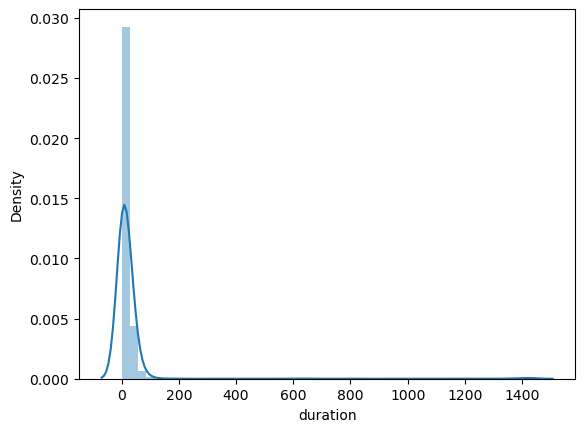

In [87]:
sns.distplot(df['duration'])

In [88]:
df['duration'].describe(percentiles=[0.95,0.98,0.99])

count    2533.000000
mean       23.010850
std       111.393898
min         0.000000
50%         7.650000
95%        47.093333
98%        69.368000
99%       104.829333
max      1436.833333
Name: duration, dtype: float64

In [89]:
df = df[df['duration']<=70]
df = df[df['duration']>=1]

In [90]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [91]:
df[categorical] = df[categorical].astype(str)

In [92]:
X = df[categorical + numerical]
y = df['duration']

In [93]:
train_dict = X.to_dict(orient='records')

In [94]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)

In [95]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=148',
 'DOLocationID=150',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=153',
 'DOLocationID=157',
 'DOLocationID=158',
 'DOLocationID=159',
 'DOLocationID=16',
 'DOLocationID=160'

In [96]:
target = 'duration'
y_train = df[target].values

In [97]:
y_train

array([13.91666667,  5.33333333,  5.33333333, ..., 16.36666667,
       29.91666667,  7.33333333])

In [98]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

/tmp/ipykernel_716/1306775787.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label= 'predictions')
/tmp/ipykernel_716/1306775787.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')


<Axes: ylabel='Density'>

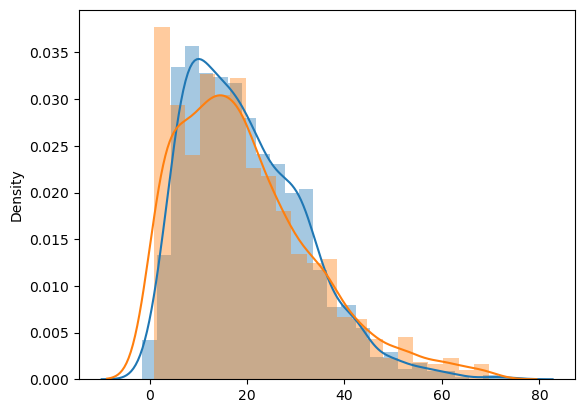

In [99]:
y_pred = lr.predict(X_train)
sns.distplot(y_pred,label= 'predictions')
sns.distplot(y_train,label='actual')

In [100]:
mean_absolute_error(y_train,y_pred)

4.914321343229632

In [101]:
with open("model.pkl","wb") as f:
    pickle.dump(lr,f)